In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np
np.random.seed(42)
import os
import shutil
import glob
import re

import IPython.display as ipd
import librosa
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
%matplotlib inline
matplotlib.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import pickle
import itertools
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from PIL import Image



In [11]:
df = pd.DataFrame()
df['full_path'] = glob.glob('/content/drive/MyDrive/Emotion_Recognition/SER/audio_speech_actors/Actor*/*')
df['fname'] = df['full_path'].apply(lambda x: x.split('/')[-1])

features = {'modality':{'01':'full-AV',
                        '02':'video-only',
                        '03':'audio-only'},
            'vocal channel':{'01':'speech',
                             '02':'song'},
            'emotion':{'01':'neutral',
                       '02':'calm',
                       '03':'happy',
                       '04':'sad',
                       '05':'angry',
                       '06':'fearful',
                       '07':'disgust',
                       '08':'surprised'},
            'emotional intensity':{'01':'normal',
                                   '02':'strong'},
            'statement':{'01':'Kids are talking by the door',
                         '02':'Dogs are sitting by the door'},
            'repetition':{'01':'1st repetition',
                          '02':'2nd repetition'}}
c = 0
for feature in features:
    df[feature] = df['fname'].apply(lambda x: features[feature][re.split(r"-|.wav|\(|\)", x)[c]])
    c += 1

df['sex'] = df['fname'].apply(lambda x: 'female' if int(re.split(r"-|.wav|\(|\)", x)[-2]) % 2 == 0 else 'male')

df.head()

,full_path,fname,modality,vocal channel,emotion,emotional intensity,statement,repetition,sex
0,/content/drive/MyDrive/Emotion_Recognition/SER...,03-01-01-01-02-02-01.wav,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd repetition,male
1,/content/drive/MyDrive/Emotion_Recognition/SER...,03-01-02-02-02-02-01.wav,audio-only,speech,calm,strong,Dogs are sitting by the door,2nd repetition,male
2,/content/drive/MyDrive/Emotion_Recognition/SER...,03-01-02-02-02-01-01.wav,audio-only,speech,calm,strong,Dogs are sitting by the door,1st repetition,male
3,/content/drive/MyDrive/Emotion_Recognition/SER...,03-01-02-01-01-02-01.wav,audio-only,speech,calm,normal,Kids are talking by the door,2nd repetition,male
4,/content/drive/MyDrive/Emotion_Recognition/SER...,03-01-02-02-01-02-01.wav,audio-only,speech,calm,strong,Kids are talking by the door,2nd repetition,male


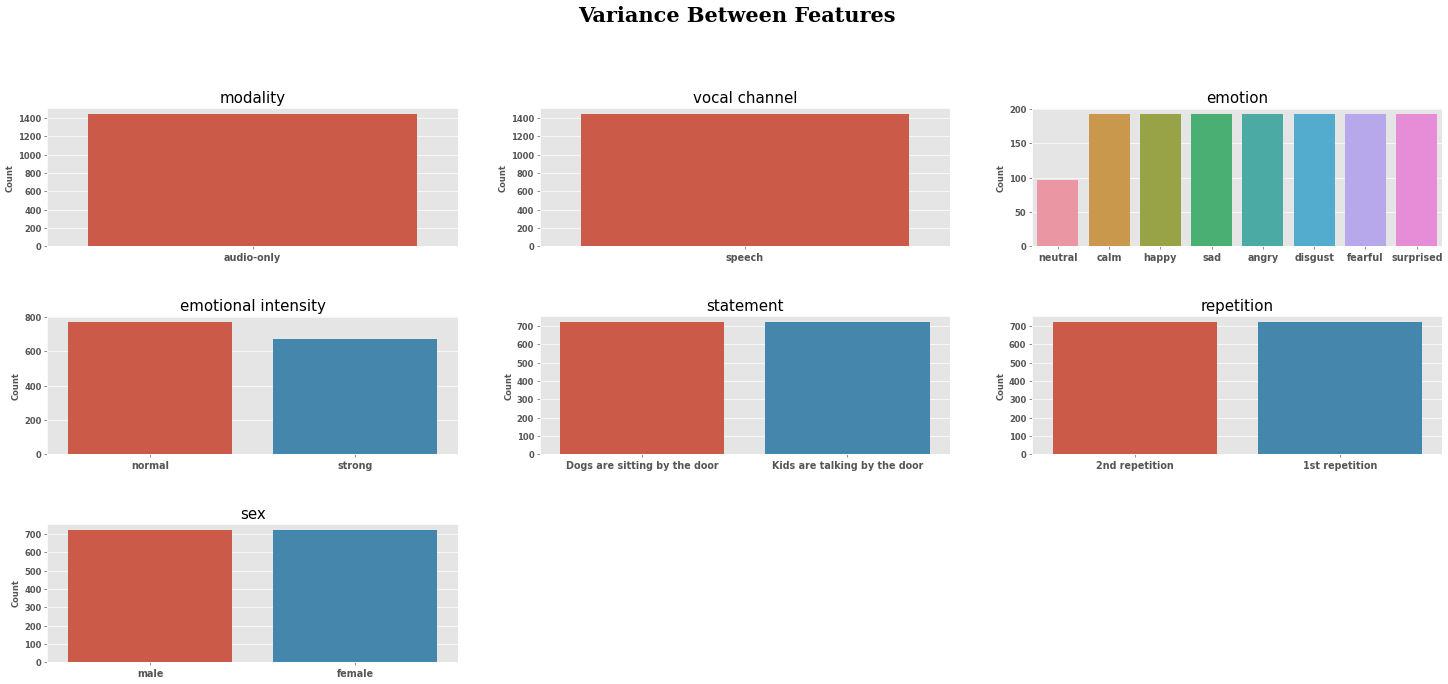

In [12]:
fig = plt.figure(figsize = (30,12),dpi = 60)

gs = fig.add_gridspec(3,3)
gs.update(wspace = 0.2, hspace = 0.5)

ax1 = fig.add_subplot(gs[:1, :1]) #distribution plot
ax2 = fig.add_subplot(gs[:1, 1:2])
ax3 = fig.add_subplot(gs[:1, 2:3])
ax4 = fig.add_subplot(gs[1:2, :1])
ax5 = fig.add_subplot(gs[1:2, 1:2])
ax6 = fig.add_subplot(gs[1:2, 2:])
ax7 = fig.add_subplot(gs[2:, :1])

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

# sns.violinplot(x='Emotion', y='audio_duration', data=df[df['Emotional intensity'] == 'normal'], order=df['Emotion'].unique(), ax=ax1)
# sns.violinplot(x='Emotion', y='audio_duration', data=df[df['Emotional intensity'] == 'strong'], order=df['Emotion'].unique(), ax=ax2)

# # setting of axes; visibility of axes and spines turn off
columns = df.columns[2:]
for i in range(len(axes)):
    sns.countplot(x=columns[i], data=df, ax=axes[i])
#     ax.axes.get_yaxis().set_visible(False)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=11.5, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=10, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=10, fontweight ='bold')
    axes[i].set_title(columns[i], size=18)
#     axes[i].set_facecolor('white')

#     for loc in ['left', 'right', 'top', 'bottom']:
#         ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('white')

fig.text(0.42, 1, 'Variance Between Features' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'})
# fig.text(0.15, 1, '', {'font':'Serif', 'color': 'black', 'size':20})
plt.show()

In [39]:
def create_waveplot(data, sr):
    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(data, sr=sr)
    plt.title('Waveplot')
#     plt.show()

def create_mfcc(data, sr):
    plt.figure(figsize=(12, 3))
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
#     plt.show()

def create_melspectrogram(data, sr):
    plt.figure(figsize=(12, 3))
    melspec = librosa.feature.melspectrogram(y=data, n_mels = 60)
    logspec = librosa.amplitude_to_db(melspec)
    librosa.display.specshow(logspec, sr=sr, x_axis='time', y_axis='hz')
    plt.title('Mel Spectrogram')
    plt.colorbar()
#     plt.show()

In [14]:
happy_audio = df[(df.emotion == 'happy') & (df.statement == 'Kids are talking by the door')].iloc[0].full_path
sad_audio = df[(df.emotion == 'sad') & (df.statement == 'Kids are talking by the door')].iloc[0].full_path
angry_audio = df[(df.emotion == 'angry') & (df.statement == 'Kids are talking by the door')].iloc[0].full_path
neutral_audio = df[(df.emotion == 'neutral') & (df.statement == 'Kids are talking by the door')].iloc[0].full_path

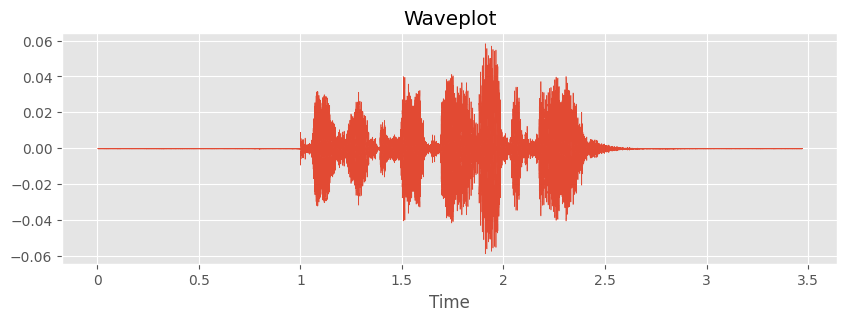

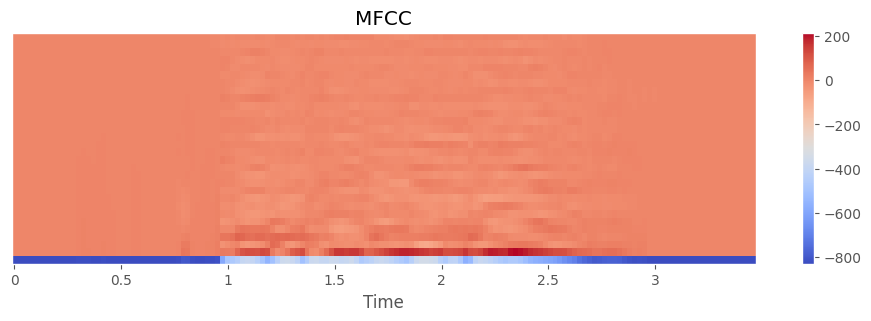

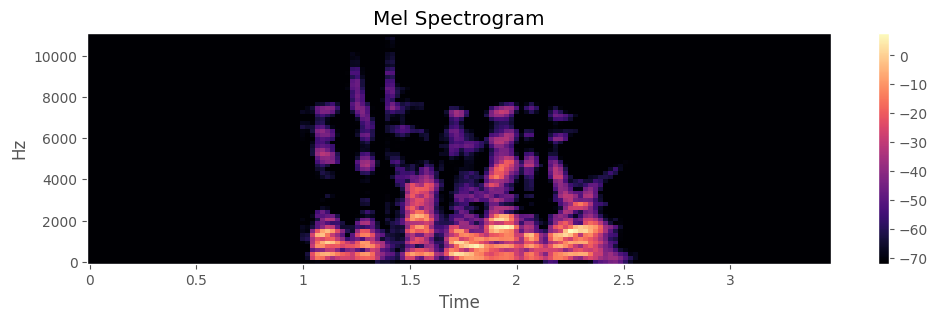

In [41]:
data, sampling_rate = librosa.load(happy_audio)
create_waveplot(data, sampling_rate)
create_mfcc(data, sampling_rate)
create_melspectrogram(data, sampling_rate)
ipd.Audio(happy_audio)
# plt.show()

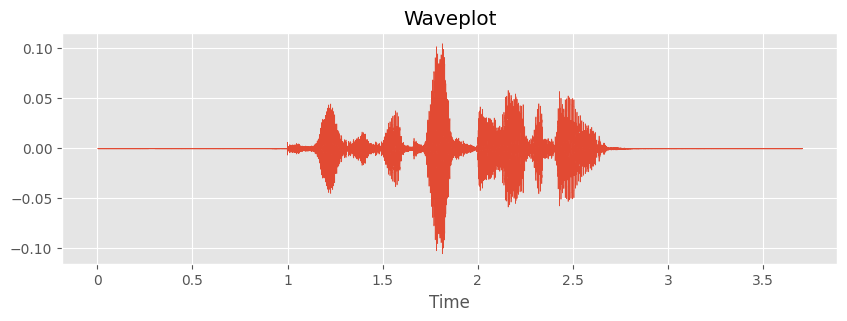

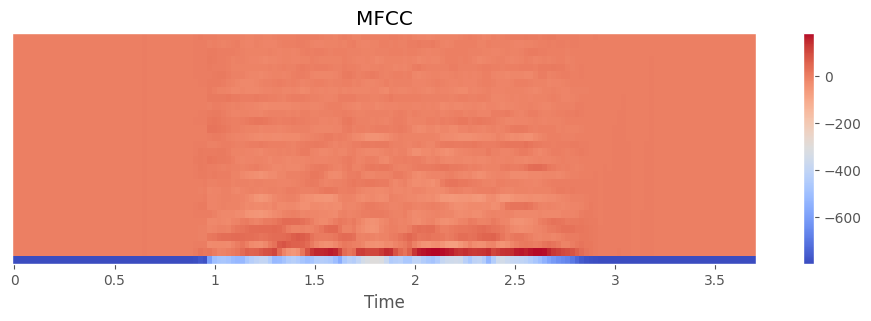

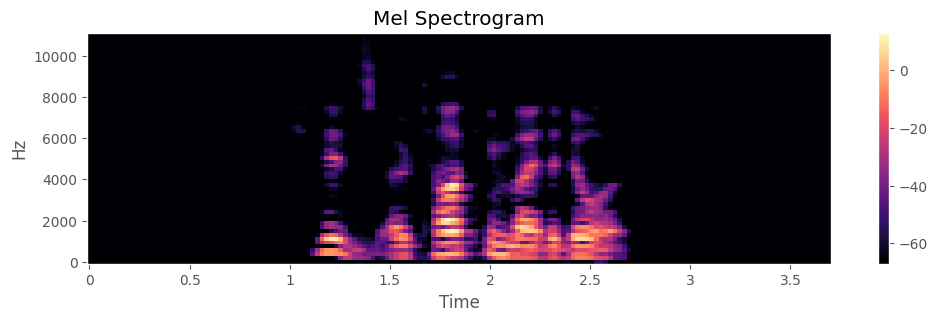

In [16]:
data, sampling_rate = librosa.load(sad_audio)
create_waveplot(data, sampling_rate)
create_mfcc(data, sampling_rate)
create_melspectrogram(data, sampling_rate)
ipd.Audio(sad_audio)

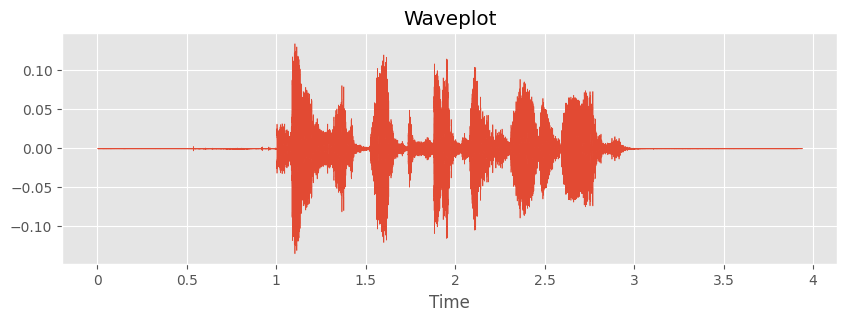

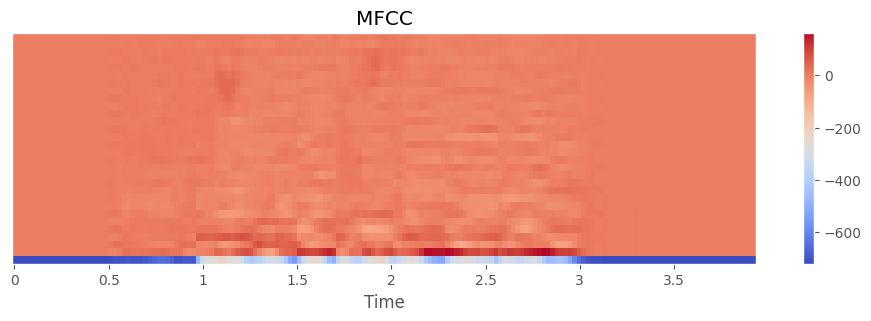

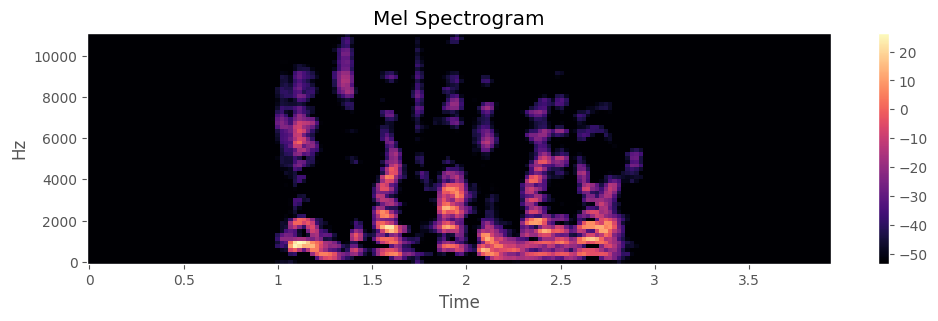

In [17]:
data, sampling_rate = librosa.load(angry_audio)
create_waveplot(data, sampling_rate)
create_mfcc(data, sampling_rate)
create_melspectrogram(data, sampling_rate)
ipd.Audio(angry_audio)

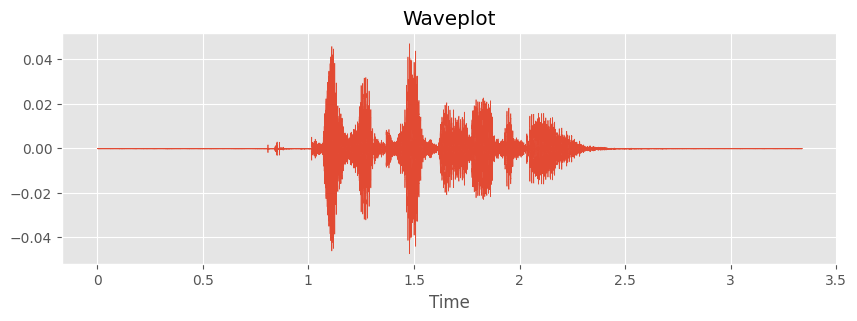

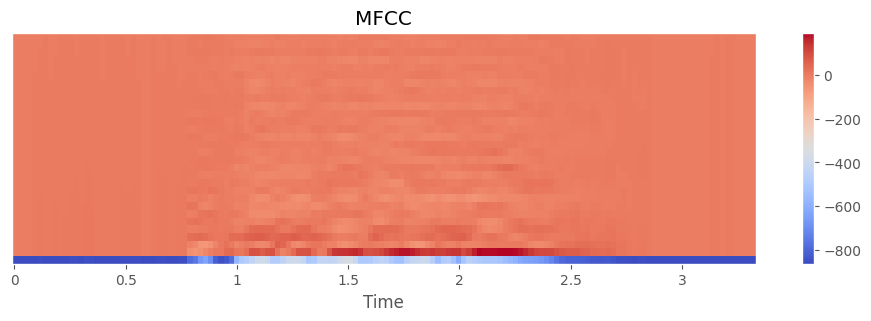

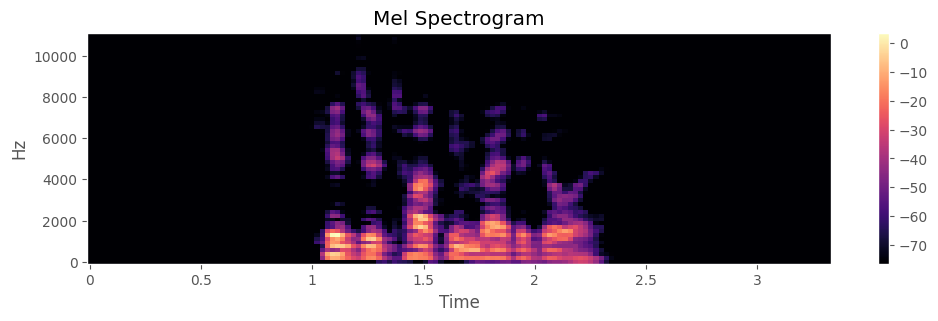

In [18]:
data, sampling_rate = librosa.load(neutral_audio)
create_waveplot(data, sampling_rate)
create_mfcc(data, sampling_rate)
create_melspectrogram(data, sampling_rate)
ipd.Audio(neutral_audio)

In [22]:
normal_audio = df[(df.emotion == 'disgust') & (df.statement == 'Kids are talking by the door') & (df['emotional intensity']== 'normal')].iloc[0].full_path
strong_audio = df[(df.emotion == 'disgust') & (df.statement == 'Kids are talking by the door') & (df['emotional intensity'] == 'strong')].iloc[0].full_path

In [42]:
def create_waveplot_normal(data, sr):
    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(data, sr=sr)
    plt.title('Waveplot for normal audio')
#     plt.show()

def create_waveplot_strong(data, sr):
    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(data, sr=sr)
    plt.title('Waveplot for strong audio')
#     plt.show()

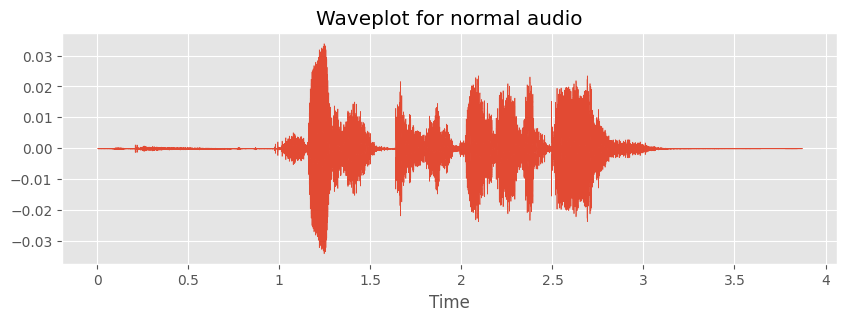

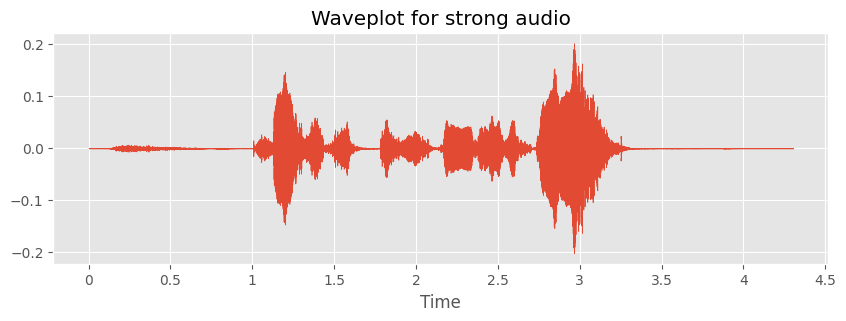

In [43]:
data1, sampling_rate1 = librosa.load(normal_audio)
create_waveplot_normal(data1, sampling_rate1)
#create_mfcc(data, sampling_rate)
#create_melspectrogram(data, sampling_rate)
ipd.Audio(normal_audio)

data, sampling_rate = librosa.load(strong_audio)
create_waveplot_strong(data, sampling_rate)
#create_mfcc(data, sampling_rate)
#create_melspectrogram(data, sampling_rate)
ipd.Audio(strong_audio)

In [63]:
def create_waveplot_happy(data, sr):
    plt.subplot(221)
    #plt.figure(figsize=(5, 3))
    librosa.display.waveshow(data, sr=sr)
    plt.title('Happy audio')
#     plt.show()

def create_waveplot_sad(data, sr):
    plt.subplot(222)
    #plt.figure(figsize=(5, 3))
    librosa.display.waveshow(data, sr=sr)
    plt.title('Sad audio')
#     plt.show()

def create_waveplot_angry(data, sr):
    plt.subplot(223)
    #plt.figure(figsize=(10, 3))
    librosa.display.waveshow(data, sr=sr)
    plt.title('Angry audio')
#     plt.show()

def create_waveplot_neutral(data, sr):
    plt.subplot(224)
    #plt.figure(figsize=(10, 3))
    librosa.display.waveshow(data, sr=sr)
    plt.title('Neutral audio')
#     plt.show()

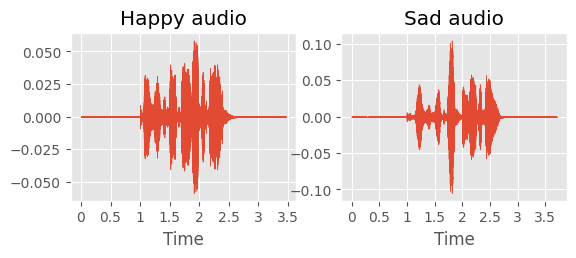

In [64]:
data1, sampling_rate1 = librosa.load(happy_audio)
create_waveplot_happy(data1, sampling_rate1)

data2, sampling_rate2 = librosa.load(sad_audio)
create_waveplot_sad(data2, sampling_rate2)



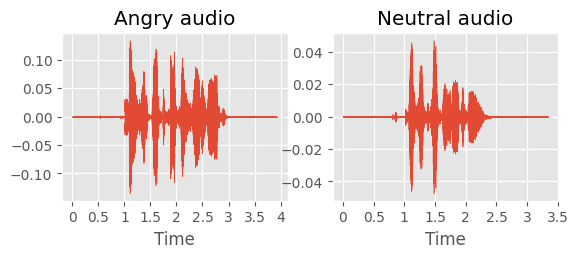

In [59]:
data1, sampling_rate1 = librosa.load(angry_audio)
create_waveplot_angry(data1, sampling_rate1)

data2, sampling_rate2 = librosa.load(neutral_audio)
create_waveplot_neutral(data2, sampling_rate2)

In [65]:
def get_audio_duration(path):
    data, sr = librosa.load(path)
    return data.shape[0]/sr

df['audio_duration'] = df['full_path'].apply(get_audio_duration)

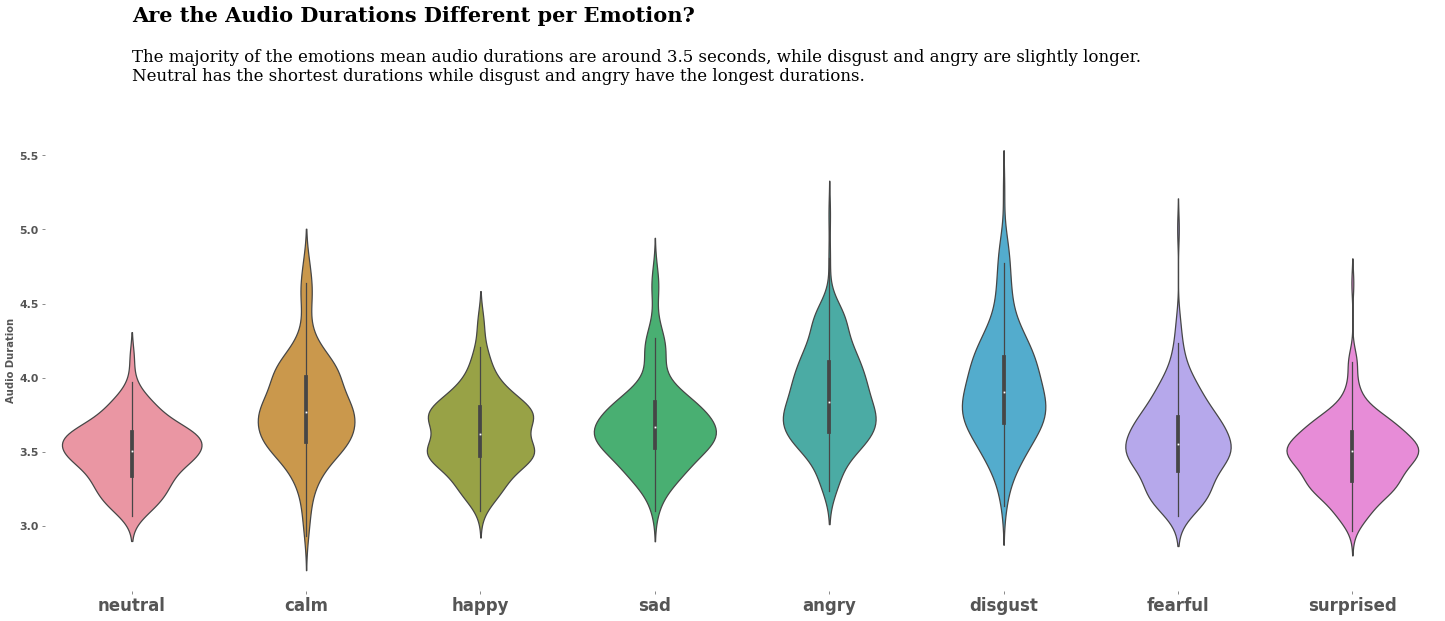

In [66]:
fig = plt.figure(figsize = (30,10),dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[:]) #distribution plot
sns.violinplot(x='emotion', y='audio_duration', data=df, order=df['emotion'].unique(), ax=ax1)
axes=[ax1]
# setting of axes; visibility of axes and spines turn off
for ax in axes:
#     ax.axes.get_yaxis().set_visible(False)
    ax.set_xticklabels(df['emotion'].unique(), fontsize=20, fontweight='bold')
    ax.set_xlabel('')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=13, fontweight='bold')
    ax.set_ylabel('Audio Duration', fontweight ='bold')
    ax.set_facecolor('white')

    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('white')

ax1.text(0, 6.4, 'Are the Audio Durations Different per Emotion?' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'})
ax1.text(0, 6,'The majority of the emotions mean audio durations are around 3.5 seconds, while disgust and angry are slightly longer. \n\
Neutral has the shortest durations while disgust and angry have the longest durations.', {'font':'Serif', 'color': 'black', 'size':20})
plt.show()

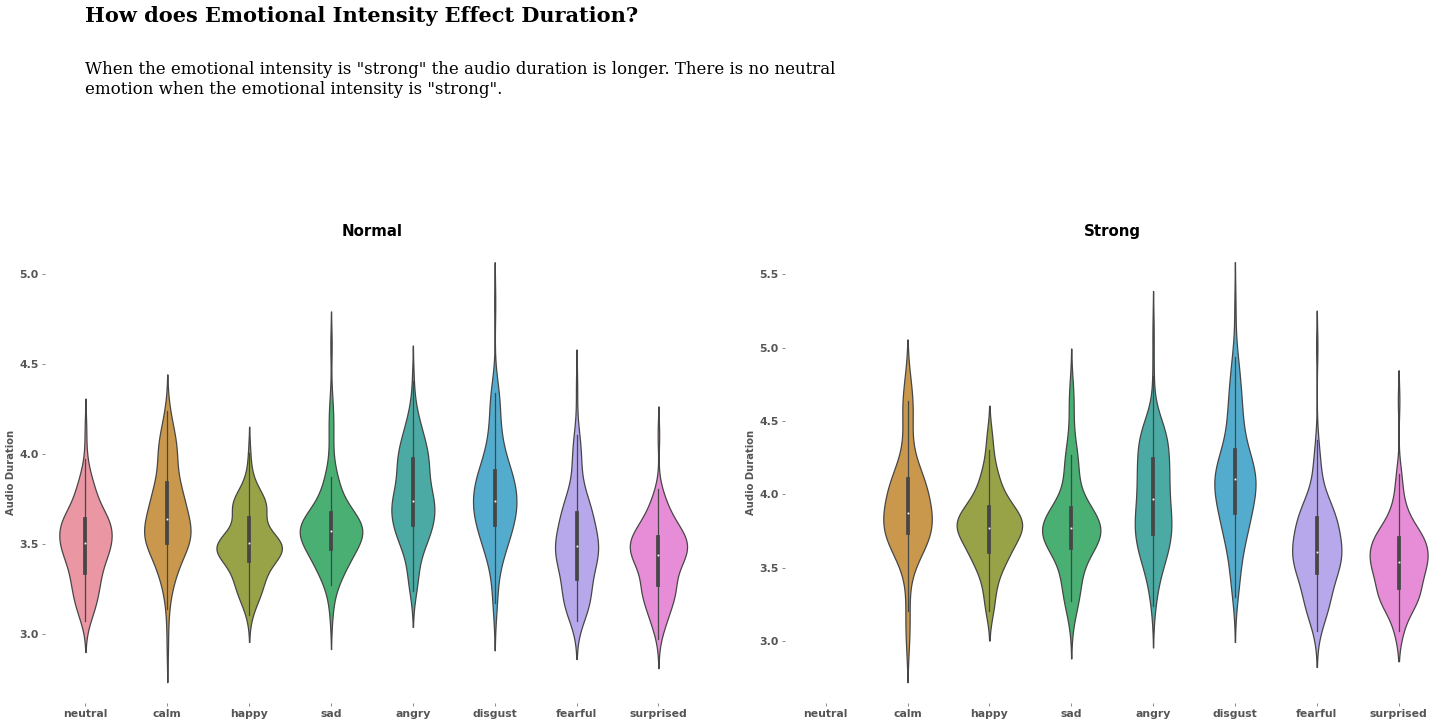

In [67]:
fig = plt.figure(figsize = (30,10),dpi = 60)

gs = fig.add_gridspec(10,25)
gs.update(wspace = 1, hspace = 0.05)

ax1 = fig.add_subplot(gs[:, :12]) #distribution plot
ax2 = fig.add_subplot(gs[:, 13:])
sns.violinplot(x='emotion', y='audio_duration', data=df[df['emotional intensity'] == 'normal'], order=df['emotion'].unique(), ax=ax1)
sns.violinplot(x='emotion', y='audio_duration', data=df[df['emotional intensity'] == 'strong'], order=df['emotion'].unique(), ax=ax2)

axes=[ax1, ax2]
# setting of axes; visibility of axes and spines turn off
for ax in axes:
#     ax.axes.get_xaxis().set_visible(False)
    ax.set_xticklabels(df['emotion'].unique(), fontsize=13, fontweight='bold')
    ax.set_xlabel('')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=13, fontweight='bold')
    ax.set_ylabel('Audio Duration', fontweight ='bold')
    ax.set_facecolor('white')

    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('white')

ax1.set_title('Normal', size=18, weight='bold')
ax2.set_title('Strong', size=18, weight='bold')

ax1.text(0, 6.4, 'How does Emotional Intensity Effect Duration?' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'})
ax1.text(0, 6,'When the emotional intensity is "strong" the audio duration is longer. There is no neutral \nemotion when the emotional intensity is "strong".', {'font':'Serif', 'color': 'black', 'size':20})
plt.show()

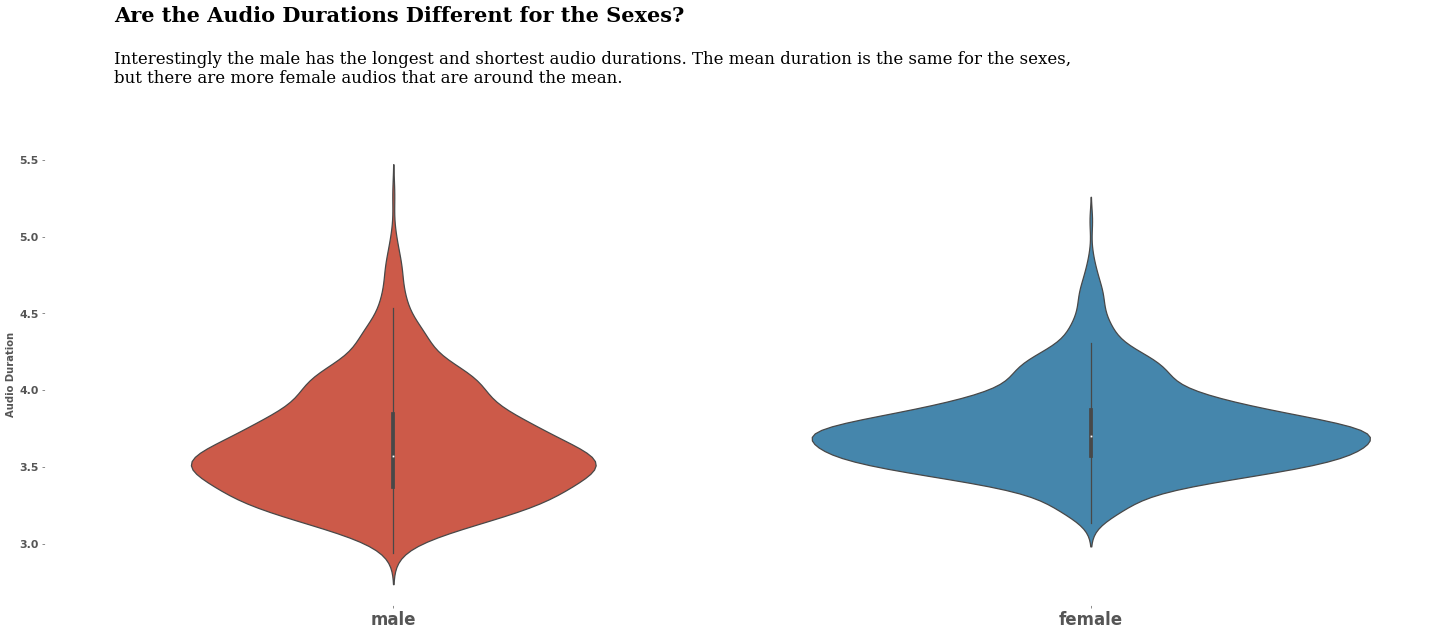

In [68]:
fig = plt.figure(figsize = (30,10),dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[:]) #distribution plot
sns.violinplot(x='sex', y='audio_duration', data=df, ax=ax1)
axes=[ax1]
# setting of axes; visibility of axes and spines turn off
for ax in axes:
#     ax.axes.get_yaxis().set_visible(False)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, fontweight='bold')
    ax.set_xlabel('')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=13, fontweight='bold')
    ax.set_ylabel('Audio Duration', fontweight ='bold')
    ax.set_facecolor('white')

#     for loc in ['left', 'right', 'top', 'bottom']:
#         ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('white')

ax1.text(-0.4, 6.4, 'Are the Audio Durations Different for the Sexes?' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'})
ax1.text(-0.4, 6, 'Interestingly the male has the longest and shortest audio durations. The mean duration is the same for the sexes, \nbut there are more female audios that are around the mean.', {'font':'Serif', 'color': 'black', 'size':20})
plt.show()